In [94]:
# You will analyze a dataset of the global average sea level change since 1880.
# You will use the data to predict the sea level change through year 2050.

# Use the data to complete the following tasks:

# Use Pandas to import the data from epa-sea-level.csv.
# Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.
# Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit.
# Plot the line of best fit over the top of the scatter plot.
# Make the line go through the year 2050 to predict the sea level rise in 2050.
# Plot a new line of best fit just using the data from year 20 00 through the most recent year in the dataset.
# Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues
# as it has since the year 2000.
# The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.
# Unit tests are written for you under test_module.py.

In [95]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [96]:
# Read data from file
df = pd.read_csv('epa-sea-level.csv')

df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


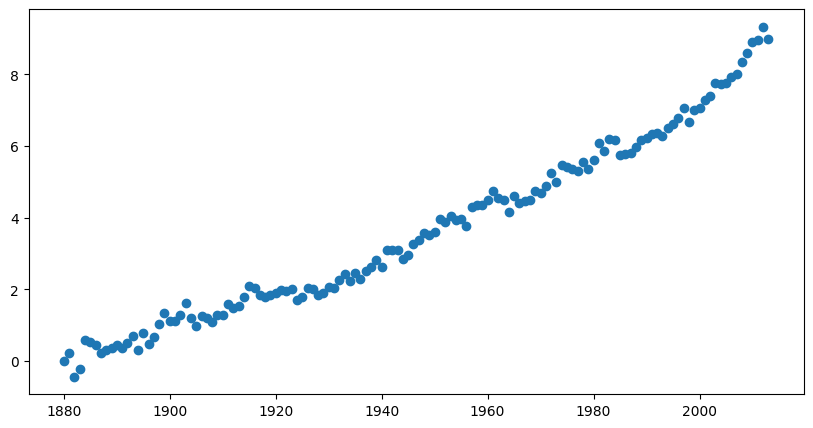

In [97]:
# Create scatter plot
fig, ax = plt.subplots(figsize=(10,5))

plt.scatter(
    x = df['Year'],
    y = df['CSIRO Adjusted Sea Level']
)

plt.show()

In [98]:
# Create first line of best fit
r = linregress(x = df['Year'], y = df['CSIRO Adjusted Sea Level'])
m = r[0]
c = r[1]

In [99]:
line_years = np.arange(1880, 2051, 1)
predicted_sea_level = (m * line_years) + c

lobf = pd.DataFrame({
    'line_year': line_years,
    'line_sea_level': predicted_sea_level
})

lobf.head()

,line_year,line_sea_level
0,1880,-0.542124
1,1881,-0.479079
2,1882,-0.416035
3,1883,-0.352990
4,1884,-0.289946


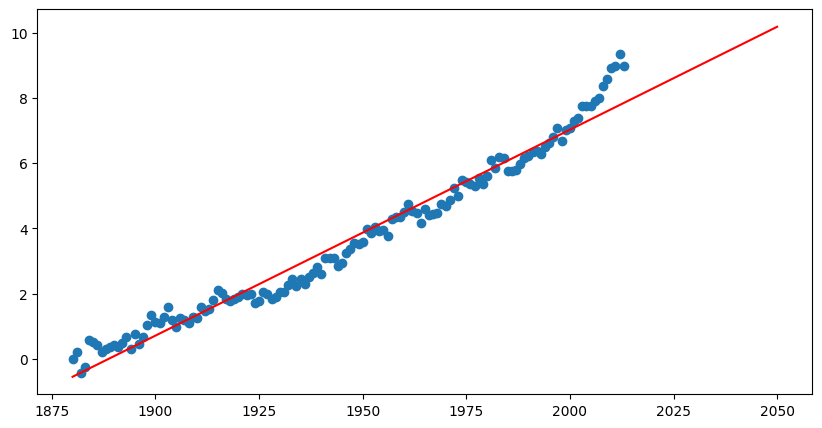

In [100]:
# Plotting line of best fit
fig, ax = plt.subplots(figsize=(10,5))

plt.scatter(
    x = df['Year'],
    y = df['CSIRO Adjusted Sea Level']
)

plt.plot(
    lobf['line_year'],
    lobf['line_sea_level'],
    color='red'
)

plt.show()

In [101]:
lobf[lobf['line_year'] == 2050]
# expected 10.175455257136548

,line_year,line_sea_level
170,2050,10.175455


In [102]:
df_2000 = df[df['Year'] >= 2000]

# Create second line of best fit
r2 = linregress(x = df_2000['Year'], y = df_2000['CSIRO Adjusted Sea Level'])
m2 = r2[0]
c2 = r2[1]

line_years_2 = np.arange(2000, 2051, 1)
predicted_sea_level_2 = (m2 * line_years_2) + c2

lobf2 = pd.DataFrame({
    'line_year': line_years_2,
    'line_sea_level': predicted_sea_level_2
})

lobf2[lobf2['line_year'] == 2050]
# expected 15.382443524364874

,line_year,line_sea_level
50,2050,15.382444


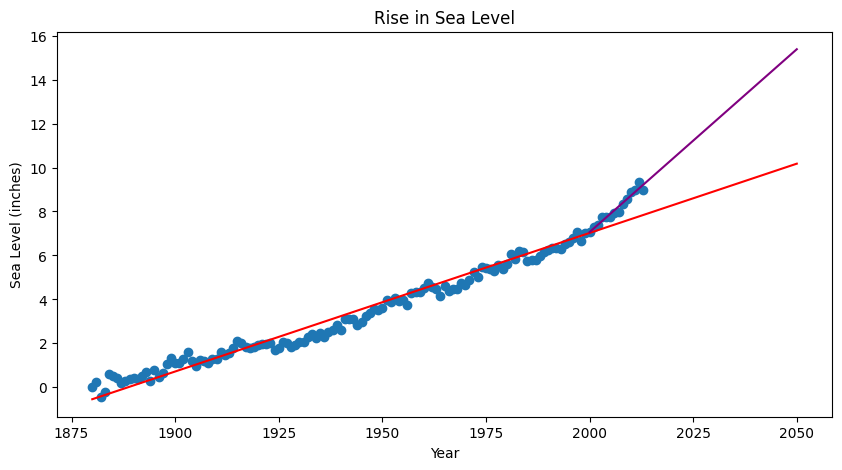

In [103]:
# Plotting second line of best fit
fig, ax = plt.subplots(figsize=(10,5))

plt.scatter(
    x = df['Year'],
    y = df['CSIRO Adjusted Sea Level']
)

plt.plot(
    lobf['line_year'],
    lobf['line_sea_level'],
    color='red'
)

plt.plot(
    lobf2['line_year'],
    lobf2['line_sea_level'],
    color='purple'
)

# Setting title and axes labels
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')

plt.show()